In [4]:
df.tail()import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
df_raw = pd.read_excel("Purchase Data - Assignment Details.xlsx")

In [6]:
df= df_raw.copy()

In [7]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [8]:
# Demographic Data Columns
dmgr = ['Sex', 'Marital status', 'Age', 'Education','Income', 'Occupation','Settlement size']
categ_dmgr = ['Sex', 'Marital status', 'Education','Occupation','Settlement size']
num_dmgr = ['Age', 'Income']

In [9]:
df_dmgr = df[dmgr]

In [10]:
df_dmgr.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


Sex
0    36044
1    22649
Name: Sex, dtype: int64


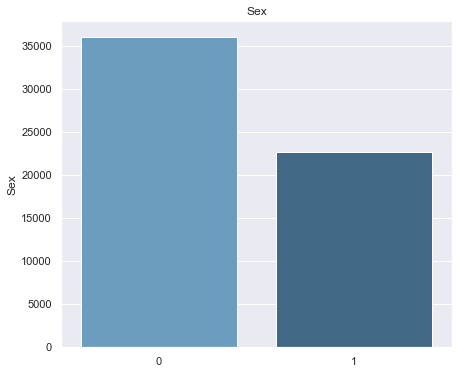



Marital status
0    35620
1    23073
Name: Marital status, dtype: int64


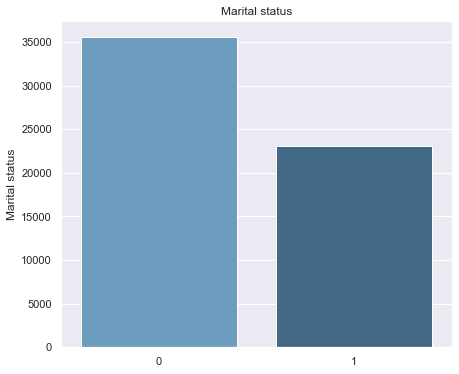



Education
1    37161
2    11716
0     8462
3     1354
Name: Education, dtype: int64


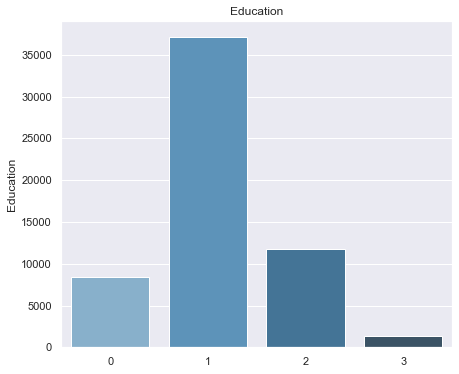



Occupation
1    29882
0    21032
2     7779
Name: Occupation, dtype: int64


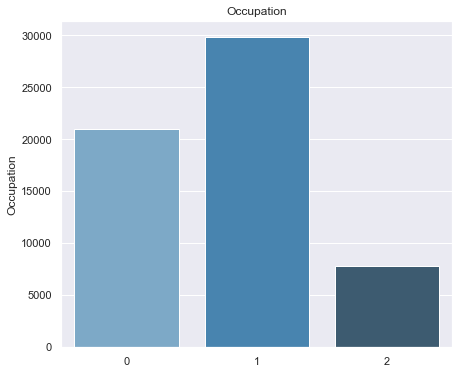



Settlement size
0    32081
1    14727
2    11885
Name: Settlement size, dtype: int64


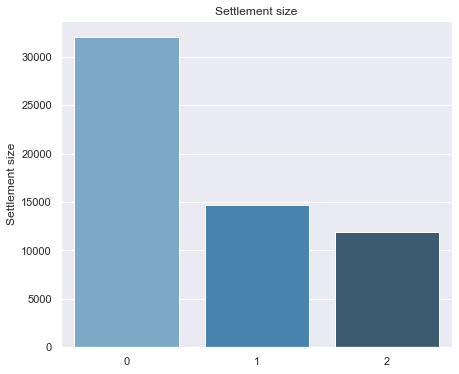

In [11]:
for col in categ_dmgr:
    plt.figure(figsize = (7, 6))
    print(col)
    print(df[col].value_counts())
    sns.barplot(x =df[col].value_counts().index , y= df[col].value_counts() ,palette="Blues_d" )
    plt.title(f'{col}')
    plt.show()
    print('\n')

Age


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


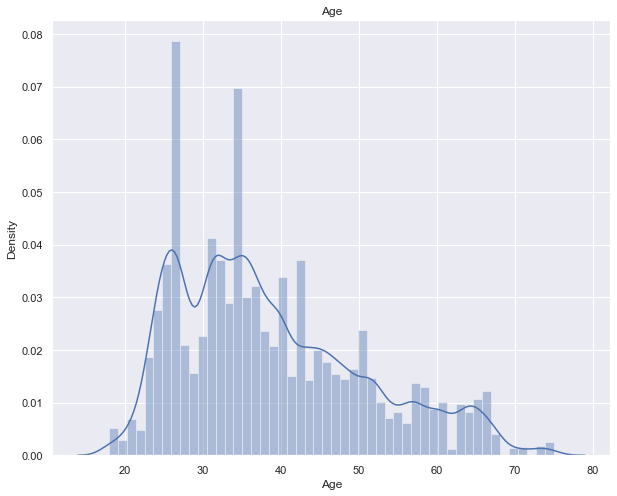



Income


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


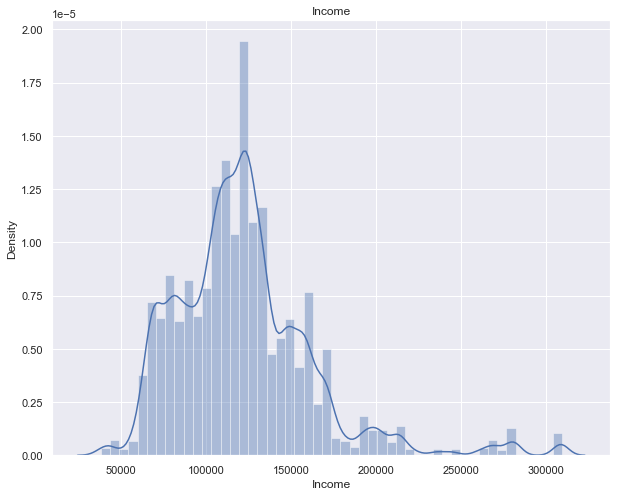

In [12]:
for col in num_dmgr:
    print(col)
    plt.figure(figsize = (10, 8))
    sns.distplot(df[col])
    plt.title(f'{col}')
    plt.show()
    print('\n')

# K-Means Clustering

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_segmentation = scaler.fit_transform(df_dmgr)

In [14]:
from sklearn.cluster import KMeans
scores={}
rng_clus = 10
for i in range(1,rng_clus):
    kmeans = KMeans(i , init='k-means++')
    model = kmeans.fit(df_segmentation)
    scores[i] = model.inertia_
    
scores_df  = pd.DataFrame.from_dict(scores , orient = 'index' )

<Figure size 720x576 with 0 Axes>

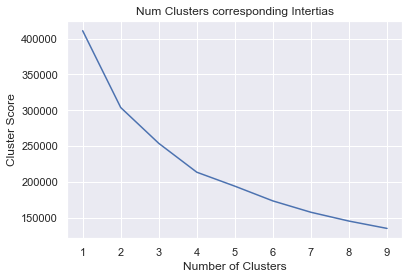

In [15]:
# Let us visualize the results
plt.figure(figsize = (10, 8))
scores_df.plot(title='Num Clusters corresponding Intertias' , legend =None)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4 , init='k-means++')
kmeans.fit(df_segmentation)
df['segment'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


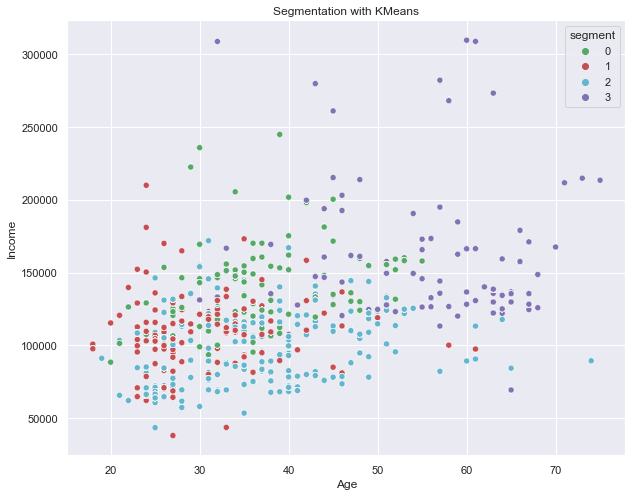

In [17]:
plt.figure(figsize = (10, 8))
sns_plot_clus = sns.scatterplot('Age','Income' , hue = 'segment' , data = df , palette = ['g', 'r', 'c', 'm'])
plt.title("Segmentation with KMeans")
plt.show()

# PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(random_state=3)
pca.fit(df_segmentation)

PCA(random_state=3)

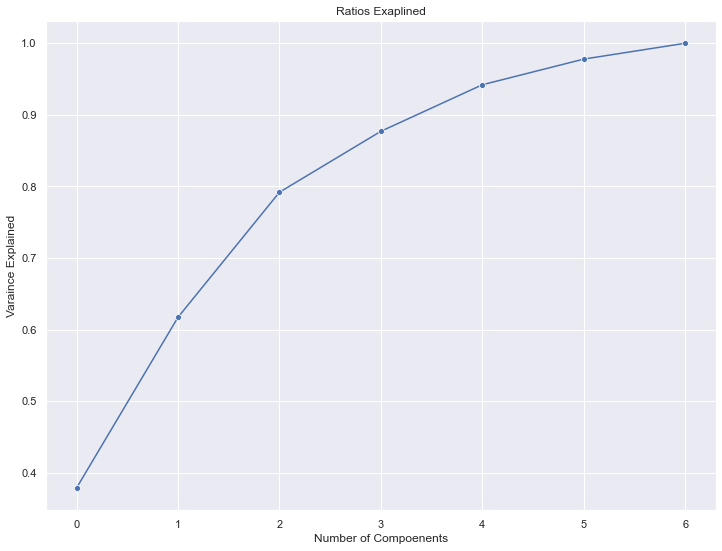

In [19]:
plt.figure(figsize = (12,9))
sns.lineplot(x =list(range(len(pca.explained_variance_ratio_)))  , y = pca.explained_variance_ratio_.cumsum() , marker = 'o')
plt.title("Ratios Exaplined")
plt.xlabel('Number of Compoenents')
plt.ylabel('Varaince Explained')
plt.show()

In [20]:
pca = PCA(n_components=3 , random_state=9)
pca.fit(df_segmentation)

PCA(n_components=3, random_state=9)

In [21]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_dmgr.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.044219,0.129980,0.383277,0.408239,0.514840,0.469535,0.426692
Component 2,0.627188,0.606626,0.018888,0.394983,-0.105629,-0.154097,-0.217642
Component 3,-0.188804,-0.317056,0.662721,0.405791,-0.160697,-0.399526,-0.272981


([<matplotlib.axis.YTick at 0x2d4f54daf70>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

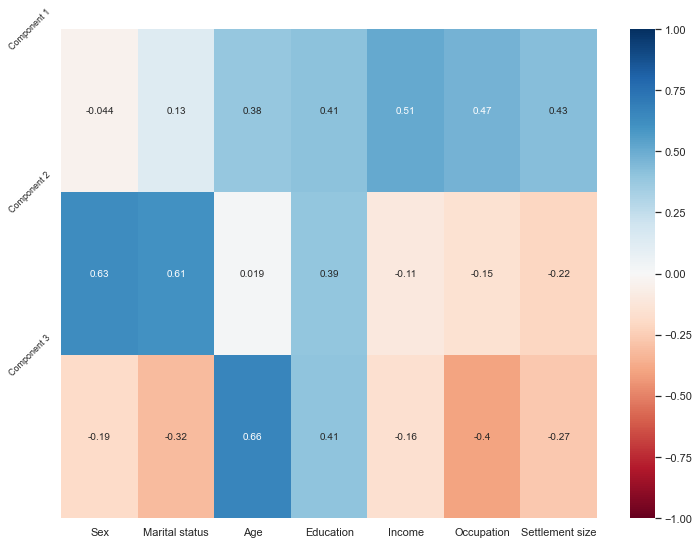

In [22]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize = (12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)

plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

# Clustering on PCA components

In [23]:
df_pca = pca.transform(df_segmentation)

In [24]:
df_pca = pd.DataFrame(df_pca , columns= ['comp1' , 'comp2', 'comp3'])

In [25]:
df= pd.concat([ df , df_pca], axis=1)

In [26]:
from sklearn.cluster import KMeans
scores={}
rng_clus = 10
for i in range(1,rng_clus):
    kmeans = KMeans(i , init='k-means++')
    model = kmeans.fit(df_pca)
    scores[i] = model.inertia_
    
scores_df  = pd.DataFrame.from_dict(scores , orient = 'index' )

<Figure size 720x576 with 0 Axes>

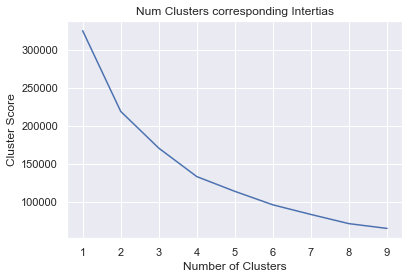

In [27]:
# Let us visualize the results
plt.figure(figsize = (10, 8))
scores_df.plot(title='Num Clusters corresponding Intertias' , legend =None)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4 , init='k-means++' , random_state=3)
kmeans.fit(df_pca)

KMeans(n_clusters=4, random_state=3)

In [29]:
df['segment'] = kmeans.labels_

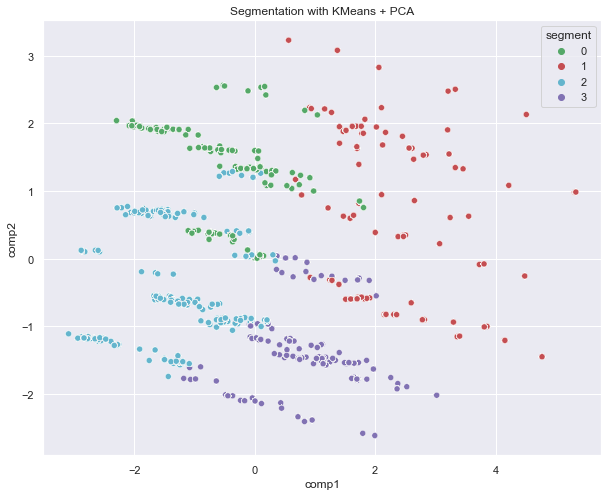

In [30]:
plt.figure(figsize = (10, 8))
sns_plot_ClusPca = sns.scatterplot(x =df_pca['comp1'] , y =df_pca['comp2']  , hue = df['segment'] , palette = ['g', 'r', 'c', 'm'])
plt.title("Segmentation with KMeans + PCA")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


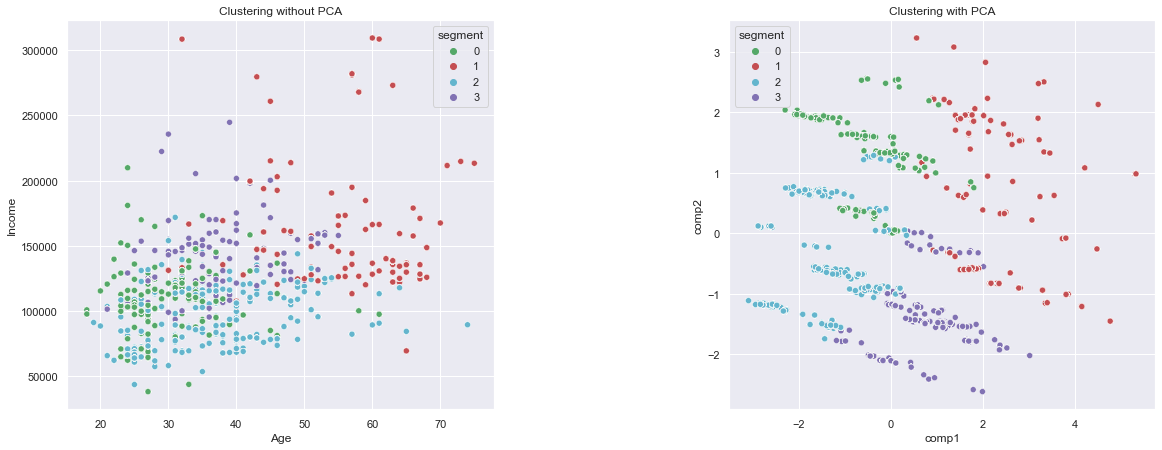

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(8)
fig.set_figwidth(20)

splot1 =  sns.scatterplot('Age','Income' , hue = 'segment' , data = df , palette = ['g', 'r', 'c', 'm'] , ax=axes[0])
axes[0].set_title("Clustering without PCA")


splot2 =sns.scatterplot(x =df_pca['comp1'] , y =df_pca['comp2']  , hue = df['segment'] , palette = ['g', 'r', 'c', 'm'], ax=axes[1])
axes[1].set_title("Clustering with PCA")



plt.show()
        

## Cluster Analysis

In [32]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Marital status,Age,Education,Income,Occupation,Settlement size,segment,comp1,comp2,comp3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,47,1,110866,1,0,2,-0.203742,-0.878217,0.925728
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,47,1,110866,1,0,2,-0.203742,-0.878217,0.925728
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,47,1,110866,1,0,2,-0.203742,-0.878217,0.925728
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,47,1,110866,1,0,2,-0.203742,-0.878217,0.925728
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,47,1,110866,1,0,2,-0.203742,-0.878217,0.925728


In [33]:
df_segment_grpby = df.groupby('segment').mean()[dmgr]
df_segment_grpby

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,0.903591,0.865567,30.557583,1.084805,111048.877390,0.722011,0.409429
1,0.464475,0.671088,54.881110,2.116427,164550.370500,1.267052,1.200549
2,0.249628,0.104644,36.458403,0.782849,96576.579658,0.260236,0.053043
3,0.000000,0.145252,38.271266,0.820907,140388.036081,1.280924,1.473692


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


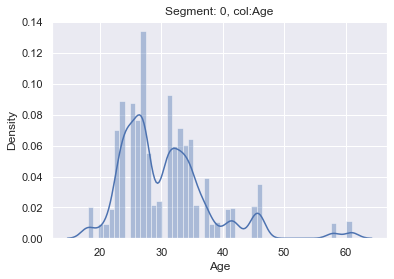

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


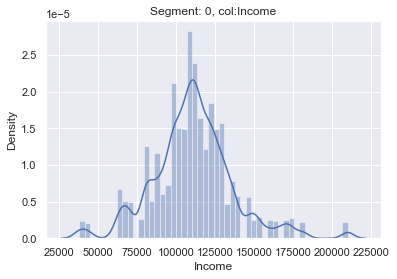

In [34]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==0][col])
    plt.title(f'Segment: 0, col:{col}')
    plt.show()
    print('\n')
        

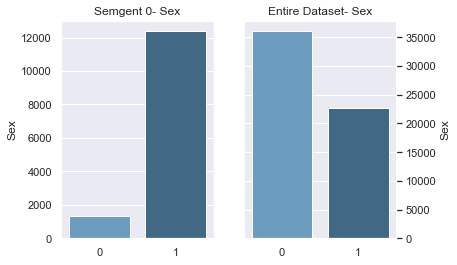

<Figure size 720x576 with 0 Axes>

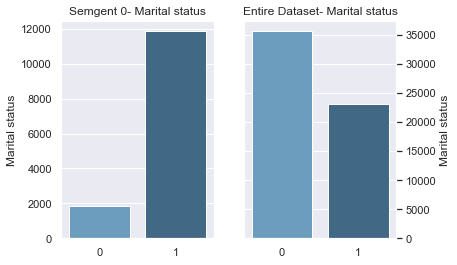

<Figure size 720x576 with 0 Axes>

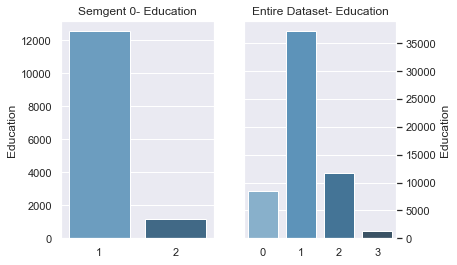

<Figure size 720x576 with 0 Axes>

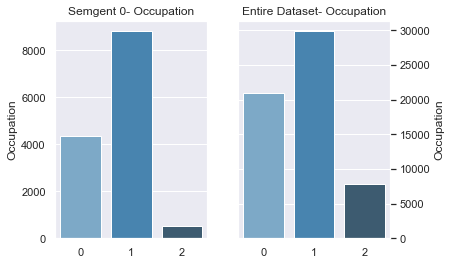

<Figure size 720x576 with 0 Axes>

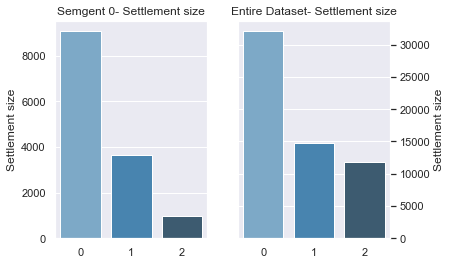

<Figure size 720x576 with 0 Axes>

In [35]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.figure(figsize = (10, 8))
    
    sns.barplot( x=df[df['segment']==0][col].value_counts().index  , y=df[df['segment']==0][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 0- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [36]:
df_segment_grpby.iloc[0,:]

Sex                     0.903591
Marital status          0.865567
Age                    30.557583
Education               1.084805
Income             111048.877390
Occupation              0.722011
Settlement size         0.409429
Name: 0, dtype: float64

In [37]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


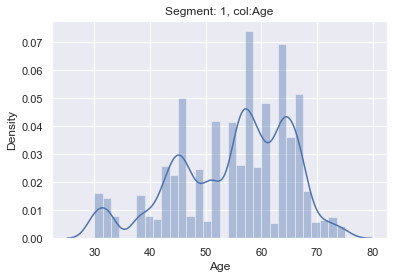

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


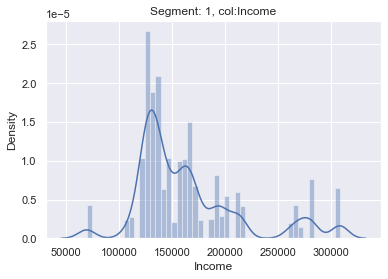

In [38]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==1][col])
    plt.title(f'Segment: 1, col:{col}')
    plt.show()
    print('\n')

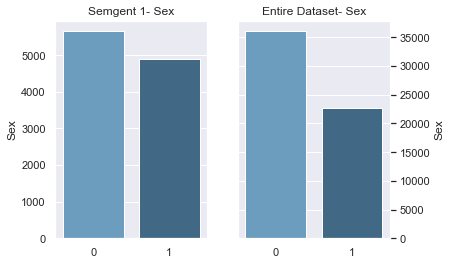

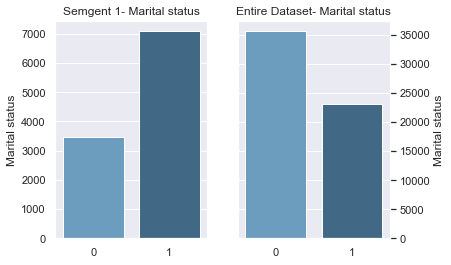

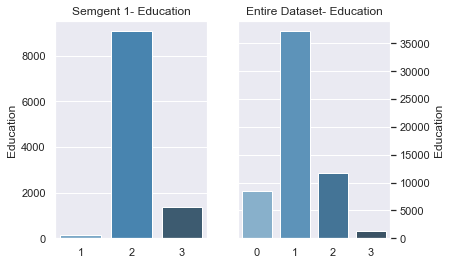

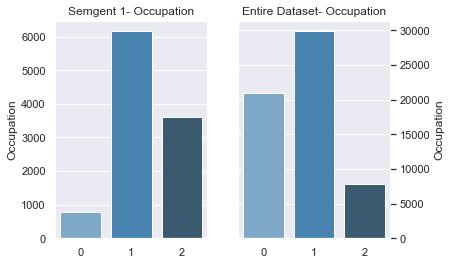

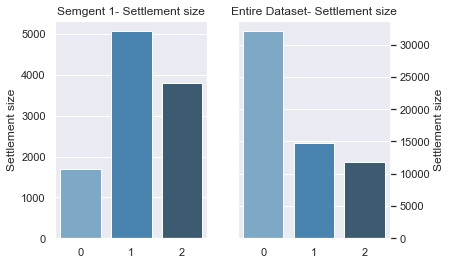

In [39]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==1][col].value_counts().index  , y=df[df['segment']==1][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 1- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [40]:
df_segment_grpby.iloc[1,:]

Sex                     0.464475
Marital status          0.671088
Age                    54.881110
Education               2.116427
Income             164550.370500
Occupation              1.267052
Settlement size         1.200549
Name: 1, dtype: float64

In [41]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


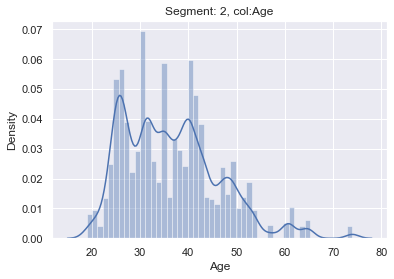

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


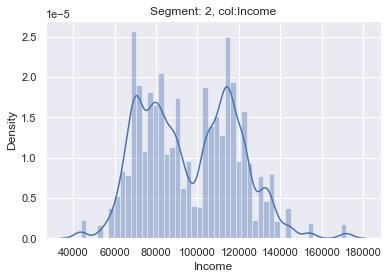

In [42]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==2][col])
    plt.title(f'Segment: 2, col:{col}')
    plt.show()
    print('\n')
        

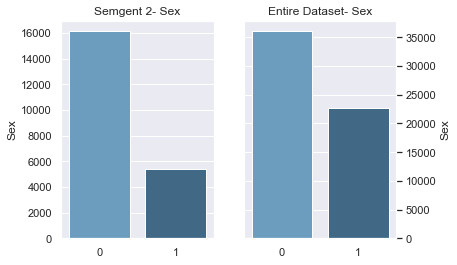

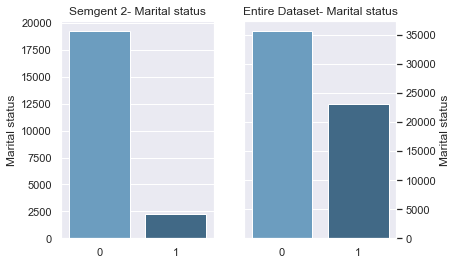

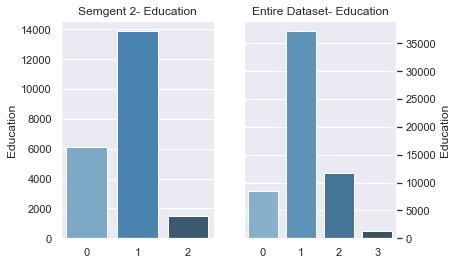

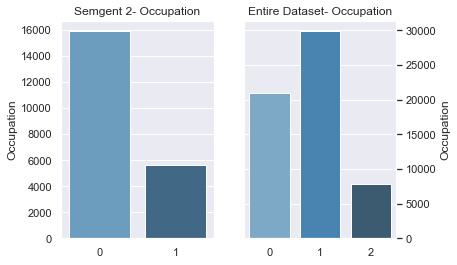

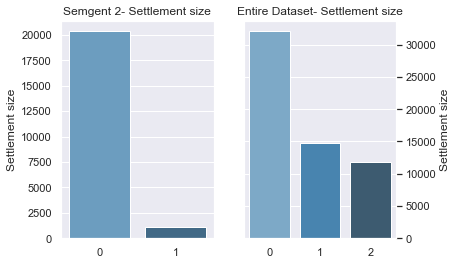

In [43]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==2][col].value_counts().index  , y=df[df['segment']==2][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 2- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [44]:
df_segment_grpby.iloc[2,:]

Sex                    0.249628
Marital status         0.104644
Age                   36.458403
Education              0.782849
Income             96576.579658
Occupation             0.260236
Settlement size        0.053043
Name: 2, dtype: float64

In [45]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


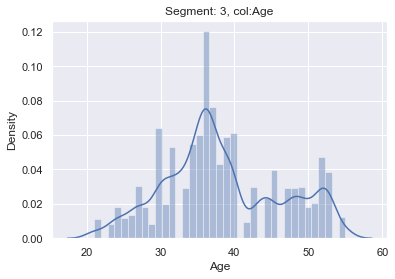

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


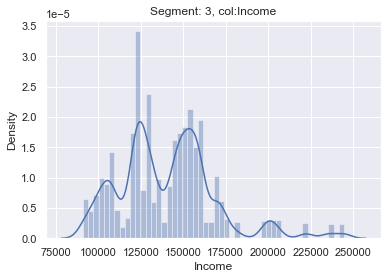

In [46]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==3][col])
    plt.title(f'Segment: 3, col:{col}')
    plt.show()
    print('\n')
        

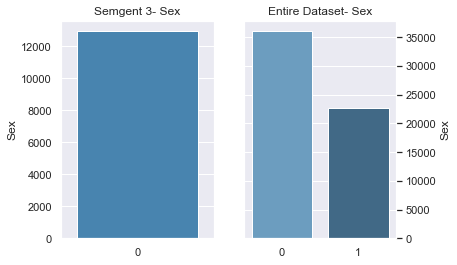

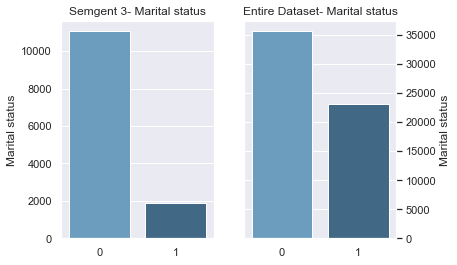

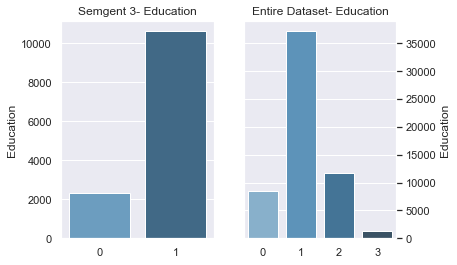

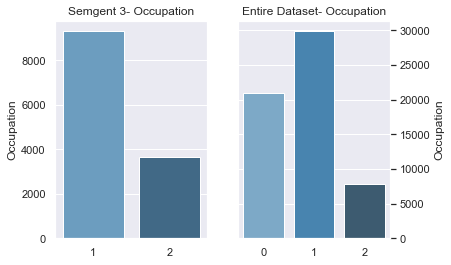

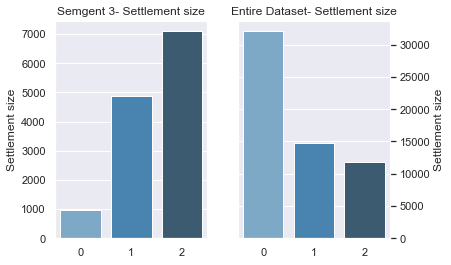

In [47]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==3][col].value_counts().index  , y=df[df['segment']==3][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 3- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [48]:
df_segment_grpby.iloc[3,:]

Sex                     0.000000
Marital status          0.145252
Age                    38.271266
Education               0.820907
Income             140388.036081
Occupation              1.280924
Settlement size         1.473692
Name: 3, dtype: float64

In [49]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [50]:
seg_name={
    3:"Working Class",
2:"veterans",
1: "urbanites",
0: "Wholesome"
    
}

In [51]:
df['segment'] = df['segment'].map(seg_name)

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline

In [53]:
df_org = pd.read_excel("Purchase Data - Assignment Details.xlsx")

In [55]:
df.tail()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0
58692,200000500,726,0,0,0,2,1,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [56]:
df["spent"] = 0.0
for i in range(len(df)):
    if(df['Incidence'][i]==1):
        brand = int(df['Brand'][i])
        df["spent"][i] = int( df["Quantity"][i] )* ( df["Price_"+str(brand)][i] )
    else:
        pass

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_20484/2618110722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["spent"][i] = int( df["Quantity"][i] )* ( df["Price_"+str(brand)][i] )


In [57]:
df_proc = pd.concat([df , pd.get_dummies(df["Brand"],  prefix = "Brand", prefix_sep = "_").drop("Brand_0" , axis=1)], axis=1)

In [58]:
df_proc.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Education,Income,Occupation,Settlement size,spent,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,1,110866,1,0,0.0,0,0,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0.0,0,0,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,1,110866,1,0,0.0,0,0,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,1,110866,1,0,0.0,0,0,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,1,110866,1,0,0.0,0,0,0,0,0
